In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
readFile=pd.read_excel('1553768847_housing.xlsx')

In [3]:
readFile.to_csv('housing.csv')

In [4]:
df=pd.read_csv('housing.csv')

In [5]:
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


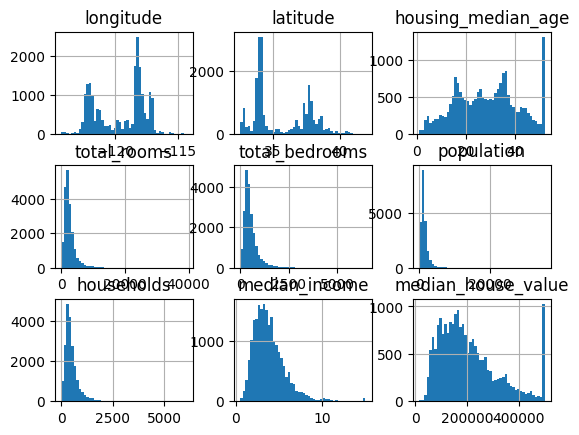

In [11]:
df.hist(bins=50)
plt.show()

<AxesSubplot:>

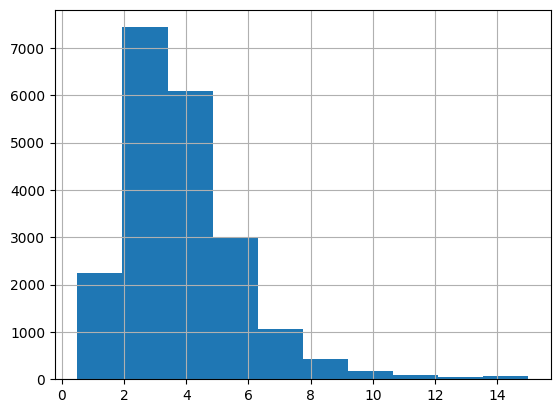

In [12]:
# median income looks like an imp feature
df['median_income'].hist()

In [13]:
#dividing the income category to limit the number income category
df['income_cat']=np.ceil(df['median_income'])

#putting eerything above 5th category as 5th category 
df['income_cat'].where(df['income_cat']<5, other=5.0, inplace=True)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for trainIndex, testIndex in split.split(df, df['income_cat']):
    stratTrainSet=df.loc[trainIndex]
    startTestSet=df.loc[testIndex]

In [15]:
df['income_cat'].value_counts()/len(df)

5.0    0.391812
4.0    0.249516
3.0    0.239632
2.0    0.111337
1.0    0.007703
Name: income_cat, dtype: float64

In [16]:
startTestSet['income_cat'].value_counts()/len(startTestSet)

5.0    0.391715
4.0    0.249516
3.0    0.239583
2.0    0.111434
1.0    0.007752
Name: income_cat, dtype: float64

as seen above the proportions are maintained in the test set using stratified sampling

[why stratified?] : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class

In [17]:
#experimenting: with random sampling now

from sklearn.model_selection import train_test_split

trainSet, testSet=train_test_split(df, test_size=0.2, random_state=29)

In [18]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts()/len(data)

In [19]:
comparingProps=pd.DataFrame({
    'Overall Props':income_cat_proportions(df),
    'Random':income_cat_proportions(testSet),
    'Stratified':income_cat_proportions(startTestSet)
}).sort_index()

comparingProps['random %error']=100*comparingProps['Random']/comparingProps['Overall Props']-100
comparingProps['strat. %error']=100*comparingProps['Stratified']/comparingProps['Overall Props']-100
comparingProps

,Overall Props,Random,Stratified,random %error,strat. %error
1.0,0.007703,0.010659,0.007752,38.364780,0.628931
2.0,0.111337,0.111434,0.111434,0.087032,0.087032
3.0,0.239632,0.232074,0.239583,-3.154064,-0.020218
4.0,0.249516,0.248547,0.249516,-0.388350,0.000000
5.0,0.391812,0.397287,0.391715,1.397304,-0.024731


In [20]:
for items in (stratTrainSet,startTestSet):
    items.drop('income_cat',axis=1,inplace=True)

In [21]:
df=stratTrainSet.copy()

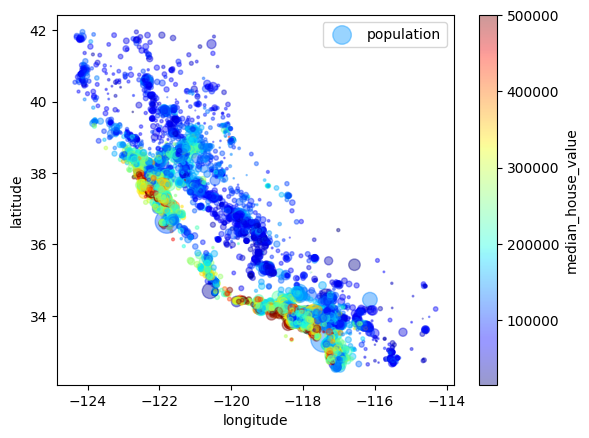

In [22]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
        s=df['population']/100,label='population',
        c='median_house_value',cmap=plt.get_cmap('jet'),sharex=False)
plt.legend()

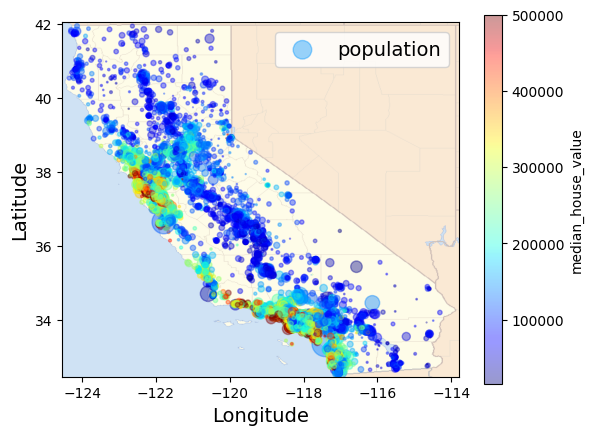

In [23]:
import matplotlib.image as mpimg

ax=df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
        s=df['population']/100,label='population',
        c='median_house_value',cmap=plt.get_cmap('jet'),sharex=False)
calImg=mpimg.imread('california.png')

plt.imshow(calImg,extent=[-124.55,-113.8,32.45,42.05],alpha=0.5,cmap=plt.get_cmap('jet'))
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)

plt.legend(fontsize=14)
plt.show()

Looking or Correlations
(Pearson's Distance Correlation equation)


In [24]:
corrMatrix=df.corr()
corrMatrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688886
total_rooms           0.138943
housing_median_age    0.107011
households            0.066467
total_bedrooms        0.050577
population           -0.023908
longitude            -0.040800
latitude             -0.149529
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

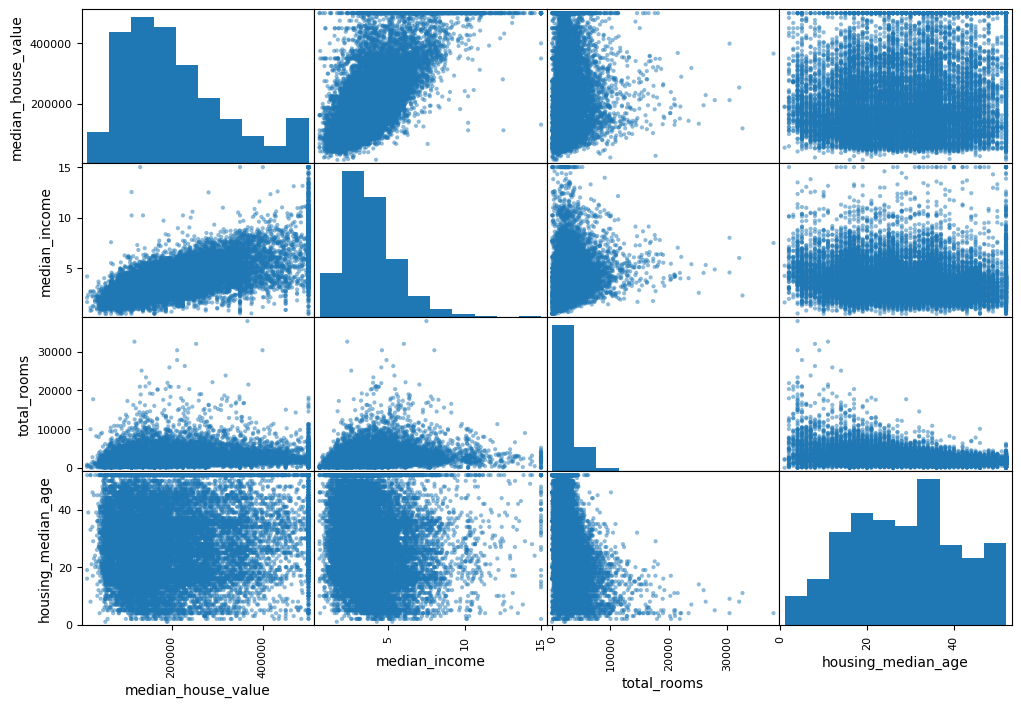

In [25]:
#other approach it to use the scatter plot in a A vs B fashiion
#problem with this is that(for N features, there will be N^2 plots)

impAtrbutes=['median_house_value','median_income','total_rooms','housing_median_age']
from pandas.plotting import scatter_matrix
scatter_matrix(df[impAtrbutes],figsize=(12,8))

(0.0, 16.0, 0.0, 550000.0)

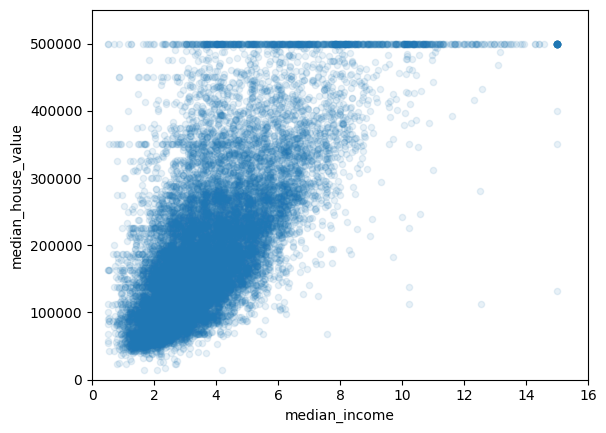

In [26]:
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)
plt.axis([0,16,0,550000])

Feature Engineering

In [27]:
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']
df['rooms_per_household']=df['total_rooms']/df['households']

In [28]:
corrMatrix=df.corr()
corrMatrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688886
rooms_per_household         0.145112
total_rooms                 0.138943
housing_median_age          0.107011
households                  0.066467
total_bedrooms              0.050577
population_per_household   -0.021886
population                 -0.023908
longitude                  -0.040800
latitude                   -0.149529
bedrooms_per_room          -0.262760
Name: median_house_value, dtype: float64

Observation: the ne bedrooms_per_room is highly correlated but in a reciprocative ay to the median_house_value, So the houses with lesser bedroom/room ratio will tend to be more expensive.

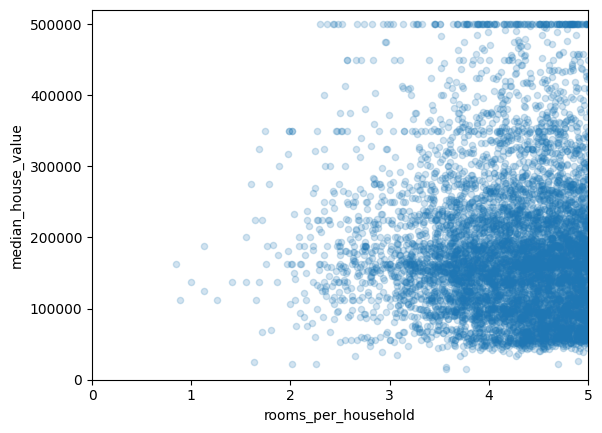

In [29]:
df.plot(kind='scatter',x='rooms_per_household',y='median_house_value',alpha=0.2)
plt.axis([0,5,0,520000])
plt.show()

In [30]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,population_per_household,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16350.000000,16512.000000,16512.000000,16512.000000,16512.00000,16350.000000,16512.000000,16512.000000
mean,-119.569818,35.635306,28.639535,2629.182776,535.876697,1422.052992,498.165698,3.875946,207111.68647,0.213038,3.081359,5.443126
std,2.003436,2.139939,12.573612,2139.810805,415.269435,1126.127384,379.098023,1.908900,115723.87134,0.058212,11.439065,2.625564
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.00000,0.100000,0.692308,0.846154
25%,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,2.564300,119400.00000,0.175242,2.432727,4.438304
50%,-118.490000,34.250000,29.000000,2124.000000,435.000000,1164.000000,409.000000,3.535250,180000.00000,0.203273,2.819632,5.230149
75%,-118.010000,37.710000,37.000000,3157.000000,647.000000,1727.250000,606.000000,4.747050,265900.00000,0.239747,3.281487,6.062248
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.00000,1.000000,1243.333333,141.909091


Preparing the data for ML algos

In [31]:
df=stratTrainSet.drop('median_house_value',axis=1)
dfLabels=stratTrainSet['median_house_value'].copy()

In [32]:
#when calculating imputing value on your own
sampleIncompleteRows=df[df.isnull().any(axis=1)].head()
median=df['total_bedrooms'].median()
sampleIncompleteRows['total_bedrooms'].fillna(median,inplace=True)
sampleIncompleteRows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19559,-120.98,37.60,36,1437,435.0,1073,320,2.1779,INLAND
7806,-118.09,33.89,42,991,435.0,717,219,4.0926,<1H OCEAN
4496,-118.22,34.05,34,1113,435.0,928,290,3.1654,<1H OCEAN
5654,-118.30,33.73,42,1731,435.0,866,403,2.7451,NEAR OCEAN
2334,-119.69,36.83,32,1098,435.0,726,224,1.4913,INLAND


In [33]:
#When using Scikit-Learns's Imputer class
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

In [34]:
dfNum=df.drop('ocean_proximity',axis=1)
imputer.fit(dfNum)

SimpleImputer(strategy='median')

In [35]:
#Imputer basically computes across all the attributes,
# so if you wanna see this across all the attributes!
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2124.     ,  435.     ,
       1164.     ,  409.     ,    3.53525])

In [36]:
dfNum.median().values

array([-118.49   ,   34.25   ,   29.     , 2124.     ,  435.     ,
       1164.     ,  409.     ,    3.53525])

using the imputer we created above, transforming the training set
by replacing the missing values by the learned medians

In [37]:
x=imputer.transform(dfNum)

In [38]:
dftr=pd.DataFrame(x, columns=dfNum.columns)

In [39]:
#cross check for missing value
dftr[dftr.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [40]:
dftr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.17,33.78,44.0,2364.0,746.0,3184.0,672.0,1.9180
1,-122.47,37.76,52.0,2465.0,489.0,1170.0,498.0,4.0793
2,-117.22,32.75,26.0,696.0,185.0,384.0,184.0,2.6121
3,-119.12,34.25,31.0,737.0,146.0,1436.0,168.0,3.5625
4,-122.16,37.72,10.0,2229.0,601.0,877.0,485.0,3.3431


Handling categorical values

In [41]:
dfcat=df['ocean_proximity']
dfcat.head(10)

8252     NEAR OCEAN
15985      NEAR BAY
14353    NEAR OCEAN
20324    NEAR OCEAN
636        NEAR BAY
7866      <1H OCEAN
16697     <1H OCEAN
5396      <1H OCEAN
14627    NEAR OCEAN
7985      <1H OCEAN
Name: ocean_proximity, dtype: object

In [42]:
#using pandas's on factorize() method to convert them into categorical features
dfcatEncoded, dfCategories=dfcat.factorize()

In [43]:
dfcatEncoded[:10]

array([0, 1, 0, 0, 1, 2, 2, 2, 0, 2], dtype=int64)

In [44]:
dfCategories

Index(['NEAR OCEAN', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [45]:
#using Scikit-Learn's OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()
dfcat1Hot=encoder.fit_transform(dfcatEncoded.reshape(1,-1))

In [46]:
dfcat1Hot

<1x16512 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
#since 1 hot encoder returns a sparse matrix, need to change it to 
#it to a dense array
dfcat1Hot.toarray()

array([[1., 1., 1., ..., 1., 1., 1.]])

Custom Transformations

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(df.values)

In [50]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(df.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-118.17,33.78,44,2364,746,3184,672,1.918,NEAR OCEAN,3.51786,4.7381
1,-122.47,37.76,52,2465,489,1170,498,4.0793,NEAR BAY,4.9498,2.3494
2,-117.22,32.75,26,696,185,384,184,2.6121,NEAR OCEAN,3.78261,2.08696
3,-119.12,34.25,31,737,146,1436,168,3.5625,NEAR OCEAN,4.3869,8.54762
4,-122.16,37.72,10,2229,601,877,485,3.3431,NEAR BAY,4.59588,1.80825


In [51]:
## Setting up Pipeline for all the preprocessings

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(dfNum)
housing_num_tr

array([[ 0.69873008, -0.86701651,  1.22167997, ..., -0.73330055,
         0.14483584,  1.61597814],
       [-1.447648  ,  0.99290573,  1.85795236, ..., -0.18789943,
        -0.06398979, -0.24145193],
       [ 1.17292989, -1.34835317, -0.20993289, ..., -0.63246142,
        -0.08693301,  0.82725701],
       ...,
       [ 0.60389012, -0.71747503,  1.85795236, ..., -0.26644093,
        -0.08428764,  0.05353069],
       [ 0.77360373, -0.74551405, -0.13039885, ...,  0.12330867,
         0.04687834, -0.57263353],
       [ 1.16294673, -1.32498732,  0.02866925, ..., -0.54785369,
        -0.11247573,  0.75516148]])

In [53]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values

In [54]:
# complete Pipeline

num_attribs = list(dfNum.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [55]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [56]:
housing_prepared = full_pipeline.fit_transform(df)
housing_prepared

array([[ 0.69873008, -0.86701651,  1.22167997, ...,  0.        ,
         0.        ,  1.        ],
       [-1.447648  ,  0.99290573,  1.85795236, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.17292989, -1.34835317, -0.20993289, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.60389012, -0.71747503,  1.85795236, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77360373, -0.74551405, -0.13039885, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.16294673, -1.32498732,  0.02866925, ...,  0.        ,
         0.        ,  1.        ]])

##Selecting & Training Models

In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, dfLabels)

LinearRegression()

In [58]:
# trying the full pipeline on a few training instances

some_data = df.iloc[:5]
some_labels = dfLabels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [59]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

Prediction:  [137518.96213291 276982.04670464 187447.39591053 188060.79338636
 218216.25795436]
Actual Labels:  [147500, 306700, 125000, 194100, 137500]


In [60]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(dfLabels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68553.83107772926

In [61]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, dfLabels)

DecisionTreeRegressor()

In [62]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(dfLabels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

##Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, dfLabels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [64]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())
    
    
display_scores(tree_rmse_scores)

scores:  [71939.02283505 72218.35392409 69762.55538627 71675.70876229
 75385.01984563 70751.82410521 70797.58315545 70945.2940397
 73420.64351588 69330.25234895]
mean:  71622.6257918533
std deviation:  1686.976609123872


In [65]:
lin_scores = cross_val_score(lin_reg, housing_prepared, dfLabels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

scores:  [69475.53714737 73077.11070203 66093.12404915 68452.18631484
 68250.44881654 69607.74820596 67898.76059539 67769.37140143
 70520.07131809 67226.74503153]
mean:  68837.11035823292
std deviation:  1855.9923048358821


In [66]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, dfLabels)

RandomForestRegressor(random_state=29)

In [67]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(lin_reg, housing_prepared, dfLabels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

scores:  [69475.53714737 73077.11070203 66093.12404915 68452.18631484
 68250.44881654 69607.74820596 67898.76059539 67769.37140143
 70520.07131809 67226.74503153]
mean:  68837.11035823292
std deviation:  1855.9923048358821


##Fine Tuning Model

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, dfLabels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [69]:
# to get the best combination of hyperparameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [70]:
# to get the best estimators directly
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [71]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

64760.133111828116 {'max_features': 2, 'n_estimators': 3}
55021.12453021618 {'max_features': 2, 'n_estimators': 10}
52594.649777073835 {'max_features': 2, 'n_estimators': 30}
59883.37177107541 {'max_features': 4, 'n_estimators': 3}
52863.58305375008 {'max_features': 4, 'n_estimators': 10}
50680.44591714909 {'max_features': 4, 'n_estimators': 30}
58416.861873464935 {'max_features': 6, 'n_estimators': 3}
52016.0502907343 {'max_features': 6, 'n_estimators': 10}
50286.10844289102 {'max_features': 6, 'n_estimators': 30}
58991.96555264394 {'max_features': 8, 'n_estimators': 3}
52253.334125896676 {'max_features': 8, 'n_estimators': 10}
50476.80054376338 {'max_features': 8, 'n_estimators': 30}
62030.70050848805 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54224.44870993469 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59990.235015964194 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52896.80603293332 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [72]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077804,0.011064,0.003791,0.000399,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.349474e+09,-4.289068e+09,-4.161832e+09,-3.934450e+09,-4.234550e+09,-4.193875e+09,1.437047e+08,18
1,0.242543,0.003113,0.011571,0.000488,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.032661e+09,-2.923277e+09,-3.169195e+09,-2.808122e+09,-3.203365e+09,-3.027324e+09,1.483383e+08,11
2,0.726669,0.024292,0.034296,0.004109,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.748983e+09,-2.649939e+09,-2.924906e+09,-2.730246e+09,-2.776912e+09,-2.766197e+09,8.989775e+07,7
3,0.117684,0.003287,0.004384,0.000784,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.397284e+09,-3.516798e+09,-3.781466e+09,-3.460357e+09,-3.774186e+09,-3.586018e+09,1.611271e+08,15
4,0.381397,0.007053,0.011769,0.000730,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.756642e+09,-2.632668e+09,-3.007609e+09,-2.651014e+09,-2.924859e+09,-2.794558e+09,1.487416e+08,8
5,1.150165,0.030014,0.031515,0.001620,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.627884e+09,-2.395808e+09,-2.695363e+09,-2.460229e+09,-2.663253e+09,-2.568508e+09,1.184432e+08,3
6,0.152777,0.001930,0.003996,0.000013,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.402435e+09,-3.201201e+09,-3.658159e+09,-3.242876e+09,-3.557978e+09,-3.412530e+09,1.760872e+08,13
7,0.506039,0.004871,0.010772,0.000399,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.725607e+09,-2.627731e+09,-2.728770e+09,-2.560082e+09,-2.886157e+09,-2.705669e+09,1.102513e+08,5
8,1.591414,0.124055,0.031111,0.001467,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.546727e+09,-2.388435e+09,-2.572719e+09,-2.460339e+09,-2.675244e+09,-2.528693e+09,9.806660e+07,1
9,0.205854,0.006436,0.004178,0.000389,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.568258e+09,-3.433100e+09,-3.608456e+09,-3.277901e+09,-3.512546e+09,-3.480052e+09,1.169557e+08,14


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distibs, n_iter=10, 
                                cv=5, scoring="neg_mean_squared_error", random_state=29)

rnd_search.fit(housing_prepared, dfLabels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=29),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002271008FB70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002271008FB00>},
                   random_state=29, scoring='neg_mean_squared_error')

In [74]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49460.90418316759 {'max_features': 6, 'n_estimators': 116}
50345.89723680561 {'max_features': 5, 'n_estimators': 35}
54430.71181834486 {'max_features': 1, 'n_estimators': 97}
51593.2492404671 {'max_features': 2, 'n_estimators': 114}
54448.606511279846 {'max_features': 1, 'n_estimators': 98}
49465.0294588746 {'max_features': 7, 'n_estimators': 95}
54228.15380865881 {'max_features': 1, 'n_estimators': 156}
49414.42736688848 {'max_features': 6, 'n_estimators': 149}
49359.28565539728 {'max_features': 7, 'n_estimators': 152}
54219.66631779875 {'max_features': 1, 'n_estimators': 165}


In [75]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.40909526e-02, 6.53261474e-02, 4.27424504e-02, 1.68991279e-02,
       1.65559015e-02, 1.77758295e-02, 1.63934180e-02, 3.22812913e-01,
       5.13400991e-02, 1.02185459e-01, 9.55800552e-02, 1.25597394e-02,
       1.54879965e-01, 1.10310130e-04, 4.17086882e-03, 6.57676332e-03])

In [76]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3228129129004724, 'median_income'),
 (0.15487996501454113, 'INLAND'),
 (0.10218545881885252, 'pop_per_hhold'),
 (0.0955800551668889, 'bedrooms_per_room'),
 (0.07409095264067041, 'longitude'),
 (0.06532614743563127, 'latitude'),
 (0.05134009911060348, 'rooms_per_hhold'),
 (0.04274245035371355, 'housing_median_age'),
 (0.017775829458807704, 'population'),
 (0.016899127918816204, 'total_rooms'),
 (0.016555901503477598, 'total_bedrooms'),
 (0.016393417961357456, 'households'),
 (0.012559739445141079, '<1H OCEAN'),
 (0.006576763317948149, 'NEAR OCEAN'),
 (0.004170868823460843, 'NEAR BAY'),
 (0.00011031012961721588, 'ISLAND')]

In [77]:
final_model = grid_search.best_estimator_

X_test = startTestSet.drop("median_house_value", axis=1)
y_test = startTestSet["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)